In [131]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from textblob import TextBlob
import matplotlib.pyplot as plt
import pickle
# Membaca data
df = pd.read_csv('output/preprocessed_data23.csv')
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# DATA LABELLING

In [132]:
# Fungsi untuk menentukan sentimen
def assign_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Fungsi untuk mengonversi label sentimen ke format numerik
def convert(polarity):
    if polarity == 'positive':
        return 1
    elif polarity == 'neutral':
        return 0
    else:
        return -1

# Menentukan sentimen dan konversi ke polaritas numerik
df['sentiment'] = df['stemmed'].apply(lambda x: assign_sentiment(x))
df['polarity'] = df['sentiment'].apply(lambda x: convert(x))
df.head()

,full_text,created_at,cleaned,translated,case_fold,token,stop,stemmed,sentiment,polarity
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,Fri Mar 29 11:48:49 +0000 2024,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,b These are the 2 units of Landed Houses for M...,b these are the units of landed houses for mi...,"['b', 'these', 'are', 'the', 'units', 'of', 'l...","['b', 'units', 'landed', 'houses', 'ministeria...","['b', 'unit', 'land', 'hous', 'ministeri', 'po...",neutral,0
1,Alhamdulillah terima kasih berkenan mengunjung...,Fri Mar 29 02:34:41 +0000 2024,Alhamdulillah terima kasih berkenan mengunjung...,b Alhamdulillah thank you for visiting the Ind...,b alhamdulillah thank you for visiting the ind...,"['b', 'alhamdulillah', 'thank', 'you', 'for', ...","['b', 'alhamdulillah', 'thank', 'visiting', 'i...","['b', 'alhamdulillah', 'thank', 'visit', 'indo...",neutral,0
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,Thu Mar 28 23:39:00 +0000 2024,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,b Observers Criticize 2 Projects Owned by Cong...,b observers criticize projects owned by congl...,"['b', 'observers', 'criticize', 'projects', 'o...","['b', 'observers', 'criticize', 'projects', 'o...","['b', 'observ', 'critic', 'project', 'own', 'c...",positive,1
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,Thu Mar 28 06:04:01 +0000 2024,Wow Terlihat dari pinggir jalan Gedunggedung m...,b Wow Seen from the side of the road towering ...,b wow seen from the side of the road towering ...,"['b', 'wow', 'seen', 'from', 'the', 'side', 'o...","['b', 'wow', 'seen', 'side', 'road', 'towering...","['b', 'wow', 'seen', 'side', 'road', 'tower', ...",positive,1
4,Waktu ngedrone roll off trafo PLN di pelabuhan...,Thu Mar 28 03:03:32 +0000 2024,Waktu ngedrone roll off trafo PLN di pelabuhan...,b When droned to roll off a PLN transformer at...,b when droned to roll off a pln transformer at...,"['b', 'when', 'droned', 'to', 'roll', 'off', '...","['b', 'droned', 'roll', 'pln', 'transformer', ...","['b', 'drone', 'roll', 'pln', 'transform', 'ea...",negative,-1


In [133]:
df['sentiment'].value_counts()

sentiment
neutral     1750
positive    1365
negative     320
Name: count, dtype: int64

Text(0.5, 1.0, 'Persentase Masing-Masing Sentimen')

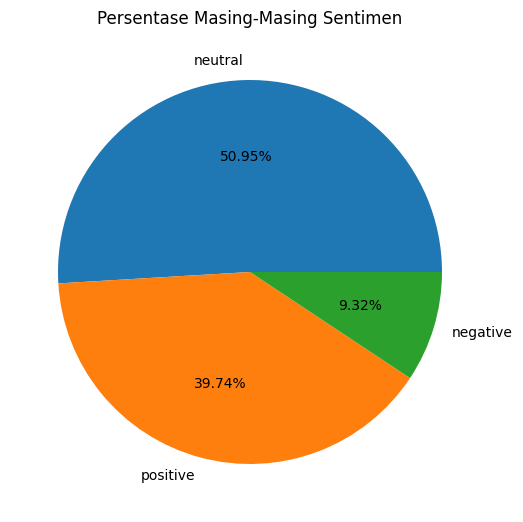

In [134]:
diagram = df['sentiment'].value_counts().rename_axis('nilai_sentimen').reset_index(name='jumlah')
label = diagram.nilai_sentimen
nilai = diagram.jumlah

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')

ax.pie(nilai, labels = label, autopct='%1.2f%%' )
ax.set_title("Persentase Masing-Masing Sentimen")

# SPLIT DATA

In [135]:
# Pembagian data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['stemmed'], df['polarity'], test_size=0.2, random_state=30)

# TF-IDF Vectorizer

In [136]:
tfidf = TfidfVectorizer()
tfidf.fit(df['stemmed'])

Train_X_Tfidf = tfidf.transform(X_train)
Test_X_Tfidf = tfidf.transform(X_test)

# PENERAPAN MODEL

In [137]:
parameters = {'alpha': [0.1, 1.0, 10.0]}
nb = BernoulliNB()
nb_tuned = GridSearchCV(nb, parameters)

In [138]:
nb_tuned.fit(Train_X_Tfidf, y_train)

GridSearchCV(estimator=BernoulliNB(), param_grid={'alpha': [0.1, 1.0, 10.0]})

In [139]:
nb = BernoulliNB(alpha=1)
nb.fit(Train_X_Tfidf, y_train)

BernoulliNB(alpha=1)

In [140]:
filename_nb = 'output/models/sklearn/model_nb_IKN.pkl'
pickle.dump(nb, open(filename_nb, 'wb'))

# PENGUJIAN MODEL

In [141]:
loaded_model_nb = pickle.load(open(filename_nb, 'rb'))
result1 = loaded_model_nb.score(Test_X_Tfidf, y_test)
print(f'{result1* 100:.2f}%')

81.66%


# EVALUASI MODEL

In [142]:
predict_test1 = nb.predict(Test_X_Tfidf)
print("NB Accuracy Score = ", accuracy_score(predict_test1, y_test)*100)
print("NB Precision Score = ", precision_score(predict_test1, y_test, average='macro')*100)
print("NB Recall Score = ", recall_score(predict_test1, y_test, average='macro')*100)
print("NB f1 Score = ", f1_score(predict_test1, y_test, average='macro')*100)


NB Accuracy Score =  81.6593886462882
NB Precision Score =  69.38539680016952
NB Recall Score =  84.6058339566193
NB f1 Score =  72.84533408556233


In [143]:
report = classification_report(predict_test1, y_test)
print(report)

              precision    recall  f1-score   support

          -1       0.36      0.92      0.52        25
           0       0.88      0.83      0.85       382
           1       0.85      0.79      0.81       280

    accuracy                           0.82       687
   macro avg       0.69      0.85      0.73       687
weighted avg       0.85      0.82      0.83       687



Text(0.5, 1.0, 'Confusion Matrix for SVM Model')

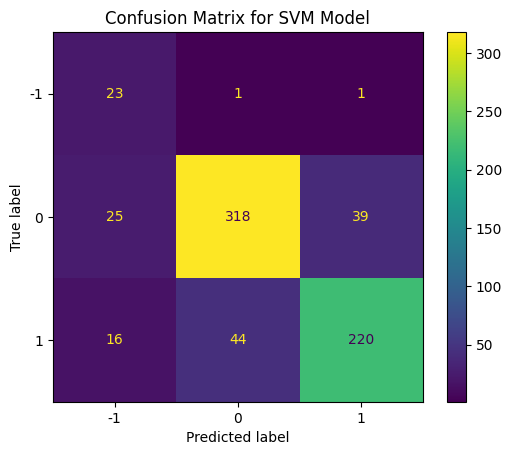

In [144]:
cm_display = ConfusionMatrixDisplay.from_predictions(predict_test1, y_test)
cm_display.ax_.set_title('Confusion Matrix for SVM Model')